In [1]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# cargamos nuestro dataset
modelo = pd.read_csv('fourth_banks.csv',sep=',')

<AxesSubplot:xlabel='banco', ylabel='roa'>

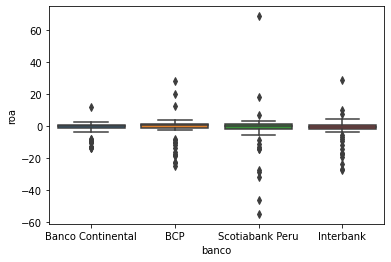

In [89]:
sns.boxplot(x="banco", y="roa", data=modelo)

In [4]:
#1) Cual ha sido el comportamiento del ROA de cada banco con respecto a V. Macroeconómicas
#pbi,tc,i
#comparación 2016 con 2021, analisis covid, primeros años de gobierno 20 
#2) Analisis de los 5 indicadores de los bancos
#EDA
#grafico de barras, boxplot, scatterplot
#3) Analisis descriptivo del efecto de los factores internos en la rentabilidad de las empresas bancarias
#4) Predicción del ROA

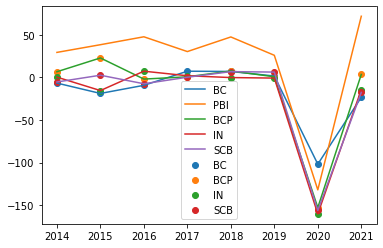

In [5]:
#Evaluación del Roa 
modelo_roa = modelo.groupby(['year', 'banco']).sum().reset_index()

# calculando datasets por banco
modelo_continental = modelo_roa[modelo_roa['banco'] == 'Banco Continental']
modelo_bcp = modelo_roa[modelo_roa['banco'] == 'BCP']
modelo_interbank = modelo_roa[modelo_roa['banco'] == 'Scotiabank Peru']
modelo_scotiabank = modelo_roa[modelo_roa['banco'] == 'Interbank']

# haciendo la grafica
plt.scatter(modelo_continental['year'], modelo_continental['roa'], label='BC')
plt.scatter(modelo_bcp['year'], modelo_bcp['roa'], label='BCP')
plt.scatter(modelo_interbank['year'], modelo_interbank['roa'], label='IN')
plt.scatter(modelo_scotiabank['year'], modelo_scotiabank['roa'], label='SCB')
plt.plot(modelo_continental['year'], modelo_continental['roa'], label='BC')
plt.plot(modelo_continental['year'], modelo_continental['pbi'], label='PBI')
plt.plot(modelo_bcp['year'], modelo_bcp['roa'], label='BCP')
plt.plot(modelo_interbank['year'], modelo_interbank['roa'], label='IN')
plt.plot(modelo_scotiabank['year'], modelo_scotiabank['roa'], label='SCB')
plt.legend()
plt.show()

<AxesSubplot:ylabel='i'>

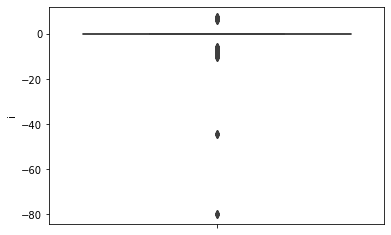

In [6]:
# ahora hacemos un boxplot de la variable success
sns.boxplot(y = 'i', data = modelo)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='i', ylabel='Density'>

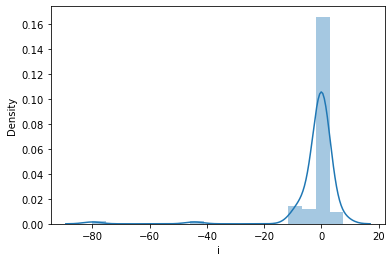

In [7]:
#seguimos con un histograma
sns.distplot(modelo['i'])

<AxesSubplot:>

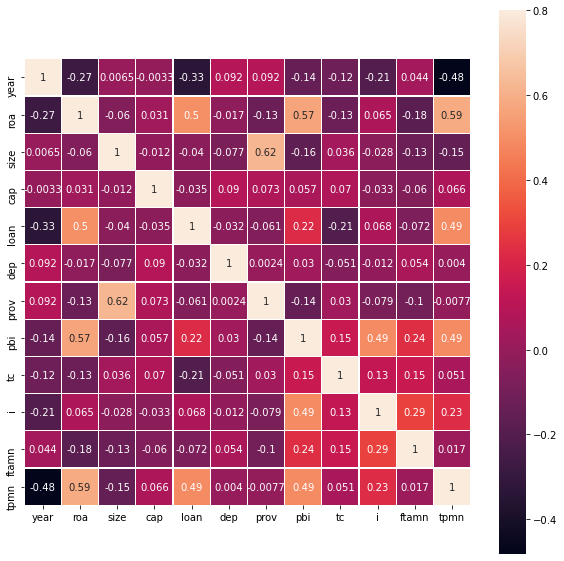

In [8]:
# si queremos mirar todas las correlaciones
corr = modelo.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

In [9]:
#filtrando para bcp

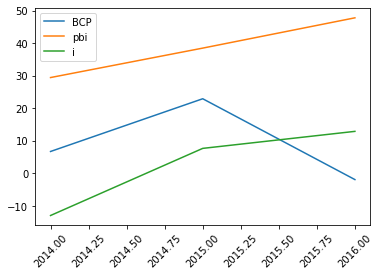

In [10]:
modelo_2016_bcp = modelo[(modelo['year']<2017) & (modelo['banco']=='BCP')]
modelo_roa_bcp_2016 = modelo_2016_bcp.groupby(['year', 'banco']).sum().reset_index()

modelo_bcp2 = modelo_roa_bcp_2016[modelo_roa_bcp_2016['banco'] == 'BCP']


plt.plot(modelo_bcp2['year'], modelo_bcp2['roa'], label='BCP')
plt.plot(modelo_bcp2['year'], modelo_bcp2['pbi'], label='pbi')
plt.plot(modelo_bcp2['year'], modelo_bcp2['i'], label='i')

plt.legend()
plt.xticks(rotation = 45)
plt.show()

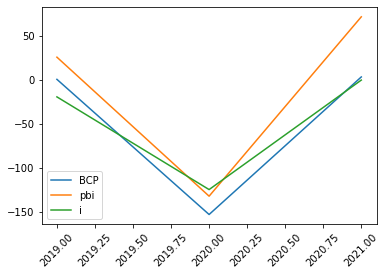

In [11]:
modelo_2019_bcp = modelo[(modelo['year']>2018) & (modelo['banco']=='BCP')]
modelo_roa_bcp_2019 = modelo_2019_bcp.groupby(['year', 'banco']).sum().reset_index()

modelo_bcp3 = modelo_roa_bcp_2019[modelo_roa_bcp_2019['banco'] == 'BCP']


plt.plot(modelo_bcp3['year'], modelo_bcp3['roa'], label='BCP')
plt.plot(modelo_bcp3['year'], modelo_bcp3['pbi'], label='pbi')
plt.plot(modelo_bcp3['year'], modelo_bcp3['i'], label='i')

plt.legend()
plt.xticks(rotation = 45)
plt.show()


<AxesSubplot:>

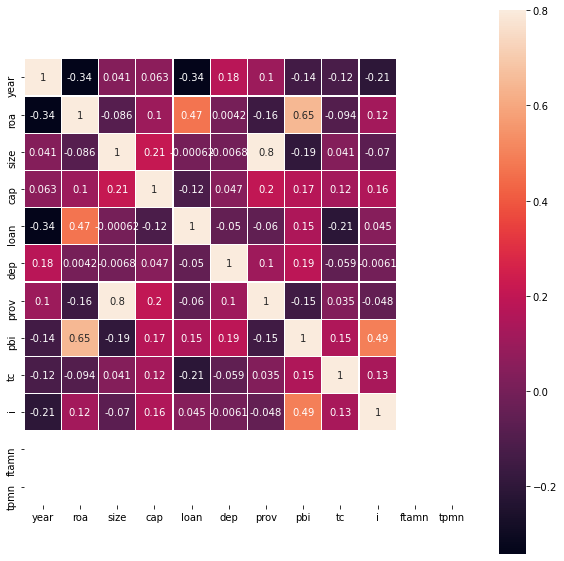

In [12]:
modelo__bcp = modelo[(modelo['banco']=='BCP')]
corr = modelo__bcp.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

<AxesSubplot:xlabel='loan', ylabel='roa'>

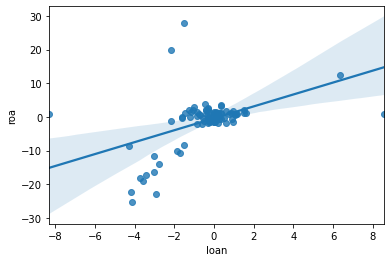

In [13]:
sns.regplot(x='loan', y="roa", data=modelo__bcp)

<AxesSubplot:xlabel='pbi', ylabel='roa'>

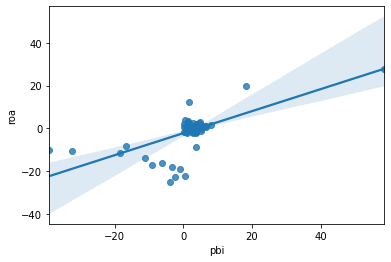

In [14]:
sns.regplot(x='pbi', y="roa", data=modelo__bcp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan', ylabel='Density'>

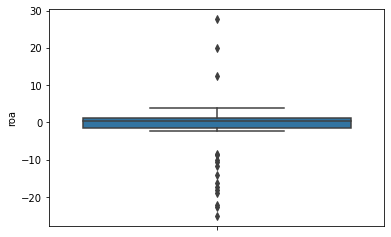

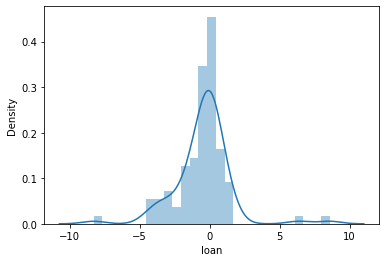

In [15]:
sns.boxplot(y = 'roa', data = modelo__bcp)
plt.figure()
sns.distplot(modelo__bcp['loan'])

In [16]:
print('minimo roa 2016: ', modelo_2016_bcp['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_bcp['pbi'].min())
print('minimo valor i 2016:', modelo_2016_bcp['i'].min())
print('minimo roa 2019: ', modelo_2019_bcp['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_bcp['pbi'].min())
print('minimo valor i 2019:', modelo_2019_bcp['i'].min())


minimo roa 2016:  -8.65143130243628
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -25.2244435606913
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [17]:
print('maximo roa 2016: ', modelo_2016_bcp['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_bcp['pbi'].max())
print('maximo valor i 2016:', modelo_2016_bcp['i'].max())
print('maximo roa 2019: ', modelo_2019_bcp['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_bcp['pbi'].max())
print('maximo valor i 2019:', modelo_2019_bcp['i'].max())

maximo roa 2016:  12.3172357789356
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  27.792864645669
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [18]:
print('promedio roa 2016: ', modelo_2016_bcp['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_bcp['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_bcp['i'].mean())
print('promedio roa 2019: ', modelo_2019_bcp['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_bcp['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_bcp['i'].mean())

promedio roa 2016:  0.7717427542680829
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -5.299157370368836
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


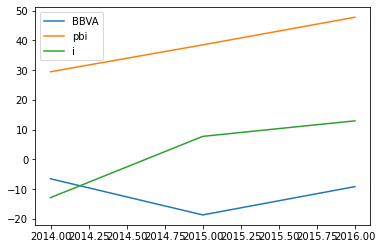

In [19]:
#Analisis del BBVA
modelo_2016_bbva = modelo[(modelo['year']<2017) & (modelo['banco']=='Banco Continental')]
modelo_roa_bbva_2016 = modelo_2016_bbva.groupby(['year', 'banco']).sum().reset_index()

modelo_bbva2 = modelo_roa_bbva_2016[modelo_roa_bbva_2016['banco'] == 'Banco Continental']

plt.plot(modelo_bbva2['year'], modelo_bbva2['roa'], label='BBVA')
plt.plot(modelo_bbva2['year'], modelo_bbva2['pbi'], label='pbi')
plt.plot(modelo_bbva2['year'], modelo_bbva2['i'], label='i')

plt.legend()
plt.show()

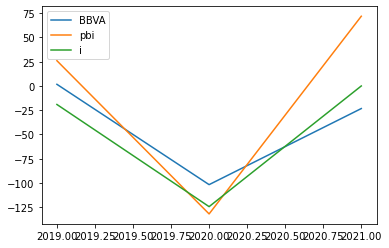

In [20]:
modelo_2019_bbva = modelo[(modelo['year']>2018) & (modelo['banco']=='Banco Continental')]
modelo_roa_bbva_2019 = modelo_2019_bbva.groupby(['year', 'banco']).sum().reset_index()

modelo_bbva3 = modelo_roa_bbva_2019[modelo_roa_bbva_2019['banco'] == 'Banco Continental']


plt.plot(modelo_bbva3['year'], modelo_bbva3['roa'], label='BBVA')
plt.plot(modelo_bbva3['year'], modelo_bbva3['pbi'], label='pbi')
plt.plot(modelo_bbva3['year'], modelo_bbva3['i'], label='i')

plt.legend()
plt.show()

In [21]:
print('minimo roa 2016: ', modelo_2016_bbva['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_bbva['pbi'].min())
print('minimo valor i 2016:', modelo_2016_bbva['i'].min())
print('minimo roa 2019: ', modelo_2019_bbva['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_bbva['pbi'].min())
print('minimo valor i 2019:', modelo_2019_bbva['i'].min())

minimo roa 2016:  -3.47745465957839
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -13.8898907127353
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [22]:
print('maximo roa 2016: ', modelo_2016_bbva['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_bbva['pbi'].max())
print('maximo valor i 2016:', modelo_2016_bbva['i'].max())
print('maximo roa 2019: ', modelo_2019_bbva['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_bbva['pbi'].max())
print('maximo valor i 2019:', modelo_2019_bbva['i'].max())

maximo roa 2016:  1.55186022625234
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  11.6426661004906
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [23]:
print('promedio roa 2016: ', modelo_2016_bbva['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_bbva['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_bbva['i'].mean())
print('promedio roa 2019: ', modelo_2019_bbva['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_bbva['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_bbva['i'].mean())

promedio roa 2016:  -0.959327151552475
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -4.405234735991798
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


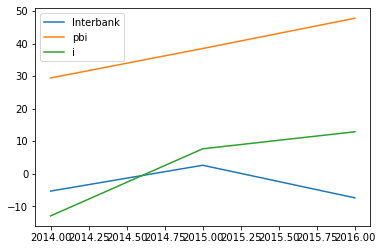

In [24]:
#Analisis del Banco Interbank
modelo_2016_interbank = modelo[(modelo['year']<2017) & (modelo['banco']=='Interbank')]
modelo_roa_interbank_2016 = modelo_2016_interbank.groupby(['year', 'banco']).sum().reset_index()

modelo_interbank2 = modelo_roa_interbank_2016[modelo_roa_interbank_2016['banco'] == 'Interbank']


plt.plot(modelo_interbank2['year'], modelo_interbank2['roa'], label='Interbank')
plt.plot(modelo_interbank2['year'], modelo_interbank2['pbi'], label='pbi')
plt.plot(modelo_interbank2['year'], modelo_interbank2['i'], label='i')

plt.legend()
plt.show()

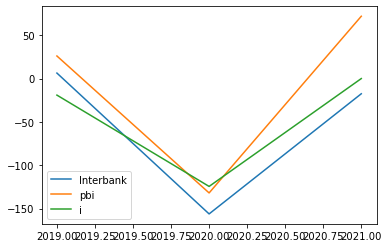

In [25]:
#Analisis del Banco Interbank
modelo_2019_interbank = modelo[(modelo['year']>2018) & (modelo['banco']=='Interbank')]
modelo_roa_interbank_2019 = modelo_2019_interbank.groupby(['year', 'banco']).sum().reset_index()

modelo_interbank3 = modelo_roa_interbank_2019[modelo_roa_interbank_2019['banco'] == 'Interbank']


plt.plot(modelo_interbank3['year'], modelo_interbank3['roa'], label='Interbank')
plt.plot(modelo_interbank3['year'], modelo_interbank3['pbi'], label='pbi')
plt.plot(modelo_interbank3['year'], modelo_interbank3['i'], label='i')

plt.legend()
plt.show()

In [26]:
print('minimo roa 2016: ', modelo_2016_interbank['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_interbank['pbi'].min())
print('minimo valor i 2016:', modelo_2016_interbank['i'].min())
print('minimo roa 2019: ', modelo_2019_interbank['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_interbank['pbi'].min())
print('minimo valor i 2019:', modelo_2019_interbank['i'].min())

minimo roa 2016:  -3.4777513088847
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -27.6480542172077
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [27]:
print('maximo roa 2016: ', modelo_2016_interbank['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_interbank['pbi'].max())
print('maximo valor i 2016:', modelo_2016_interbank['i'].max())
print('maximo roa 2019: ', modelo_2019_interbank['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_interbank['pbi'].max())
print('maximo valor i 2019:', modelo_2019_interbank['i'].max())

maximo roa 2016:  4.21968356968442
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  28.4831407675436
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [28]:
print('promedio roa 2016: ', modelo_2016_interbank['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_interbank['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_interbank['i'].mean())
print('promedio roa 2019: ', modelo_2019_interbank['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_interbank['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_interbank['i'].mean())

promedio roa 2016:  -0.2785936079031433
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -5.977566135141872
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


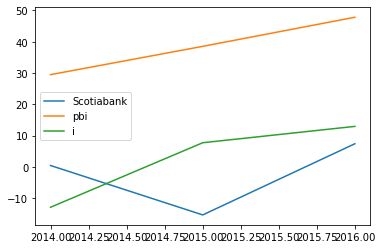

In [29]:
#Analisis del Banco Scotiabank
modelo_2016_scotiabank = modelo[(modelo['year']<2017) & (modelo['banco']=='Scotiabank Peru')]
modelo_roa_scotiabank_2016 = modelo_2016_scotiabank.groupby(['year', 'banco']).sum().reset_index()

modelo_scotiabank2 = modelo_roa_scotiabank_2016[modelo_roa_scotiabank_2016['banco'] == 'Scotiabank Peru']


plt.plot(modelo_scotiabank2['year'], modelo_scotiabank2['roa'], label='Scotiabank')
plt.plot(modelo_scotiabank2['year'], modelo_scotiabank2['pbi'], label='pbi')
plt.plot(modelo_scotiabank2['year'], modelo_scotiabank2['i'], label='i')

plt.legend()
plt.show()

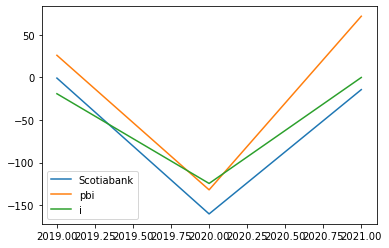

In [30]:
#Analisis del Banco Scotiabank
modelo_2019_scotiabank = modelo[(modelo['year']>2018) & (modelo['banco']=='Scotiabank Peru')]
modelo_roa_scotiabank_2019 = modelo_2019_scotiabank.groupby(['year', 'banco']).sum().reset_index()

modelo_scotiabank3 = modelo_roa_scotiabank_2019[modelo_roa_scotiabank_2019['banco'] == 'Scotiabank Peru']


plt.plot(modelo_scotiabank3['year'], modelo_scotiabank3['roa'], label='Scotiabank')
plt.plot(modelo_scotiabank3['year'], modelo_scotiabank3['pbi'], label='pbi')
plt.plot(modelo_scotiabank3['year'], modelo_scotiabank3['i'], label='i')

plt.legend()
plt.show()

In [31]:
print('minimo roa 2016: ', modelo_2016_scotiabank['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_scotiabank['pbi'].min())
print('minimo valor i 2016:', modelo_2016_scotiabank['i'].min())
print('minimo roa 2019: ', modelo_2019_scotiabank['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_scotiabank['pbi'].min())
print('minimo valor i 2019:', modelo_2019_scotiabank['i'].min())

minimo roa 2016:  -5.06579735642933
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -54.9030087636569
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [32]:
print('maximo roa 2016: ', modelo_2016_scotiabank['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_scotiabank['pbi'].max())
print('maximo valor i 2016:', modelo_2016_scotiabank['i'].max())
print('maximo roa 2019: ', modelo_2019_scotiabank['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_scotiabank['pbi'].max())
print('maximo valor i 2019:', modelo_2019_scotiabank['i'].max())

maximo roa 2016:  6.78031167360085
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  68.5014908049697
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [33]:
print('promedio roa 2016: ', modelo_2016_scotiabank['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_scotiabank['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_scotiabank['i'].mean())
print('promedio roa 2019: ', modelo_2019_scotiabank['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_scotiabank['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_scotiabank['i'].mean())

promedio roa 2016:  -0.21036942032357342
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -6.2577259630195865
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


In [34]:
#grafico de barras

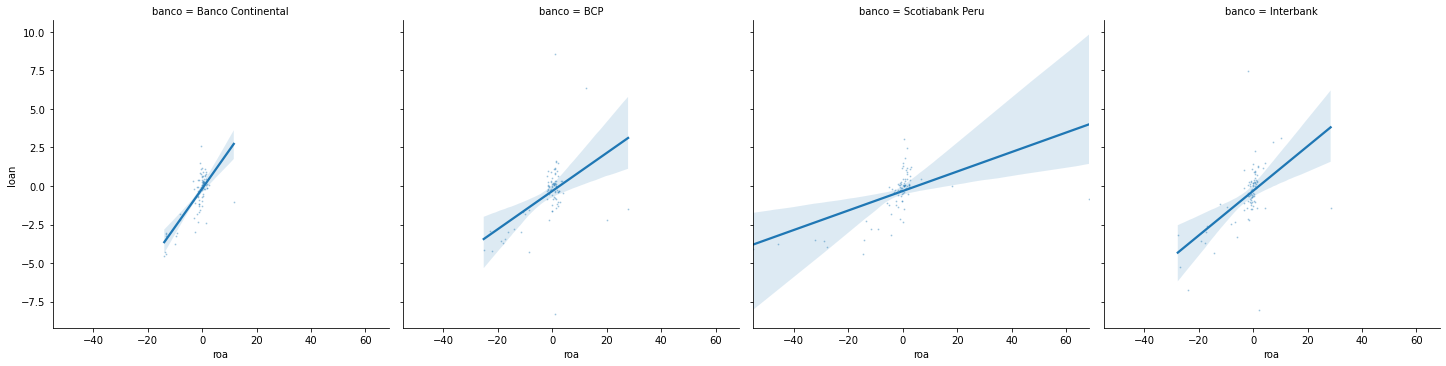

In [35]:
sns.lmplot(x='roa', y="loan", col = 'banco', data=modelo, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

<AxesSubplot:ylabel='banco'>

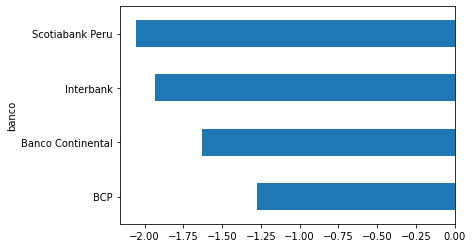

In [36]:
modelo.groupby(['banco']).mean()['roa'].plot.barh()

In [37]:
# cargamos las funciones necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
modelo__bcp.tail()

,banco,mes,year,roa,size,cap,loan,dep,prov,pbi,tc,i,ftamn,tpmn
171,BCP,diciembre,2020,-22.232111,0.960698,-0.459318,-4.202507,1.137466,1.244132,0.580000,6.730900,0.0,NaN,NaN
172,BCP,enero,2021,-18.972122,1.049062,-1.582070,-3.575566,-0.165817,0.687454,-1.019978,7.578820,0.0,NaN,NaN
173,BCP,febrero,2021,-25.224444,2.358857,-0.133958,-4.149158,0.518076,2.094209,-3.780000,6.757768,0.0,NaN,NaN
174,BCP,marzo,2021,19.972663,-0.276522,0.067069,-2.183279,1.535937,1.180930,18.210004,6.231617,0.0,NaN,NaN
175,BCP,abril,2021,27.792865,-1.377373,10.321716,-1.506652,1.158958,-3.106261,58.490344,10.776231,0.0,NaN,NaN


In [41]:
abril_21 = [-1.377373,10.321716,-1.506652,1.158958,-3.106261,58.490344]
df_abril = pd.DataFrame([abril_21],columns=columnas_interes)

In [40]:
columnas_interes = ['size','cap','loan','dep','prov','pbi']
columnas_interes2 = ['roa']
X = modelo__bcp[columnas_interes]
y = modelo__bcp[columnas_interes2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [42]:
X_test

,size,cap,loan,dep,prov,pbi
155,3.542532,-0.735786,0.092778,1.844347,0.361188,3.621629
161,2.324975,-2.833449,0.130562,0.369644,-3.011321,3.970000
97,-0.401340,7.647487,0.977306,3.061361,-2.036440,2.273357
157,27.980521,4.391892,0.348262,1.096485,56.532370,2.357418
123,-3.165983,-1.019108,1.148649,-1.840385,0.943735,3.462466
169,-0.239982,0.456919,-3.714367,0.324898,5.612336,-3.300000
174,-0.276522,0.067069,-2.183279,1.535937,1.180930,18.210004
137,0.027839,1.129568,-0.753975,-1.960095,2.567720,2.665094
158,0.727796,-1.100324,-0.849735,1.234218,5.198961,2.014025
94,1.037880,-2.474916,0.336717,-3.172187,-1.177038,1.449919


In [43]:
# crear columnas condicionalmente
condiciones = [
    (modelo__bcp["roa"]<0),
    (modelo__bcp["roa"]>=0),
]
opciones = [0.0, 1.0]

# incluir condiciones y opciones
modelo__bcp["efect_roa"] = np.select(condiciones, opciones)
modelo__bcp

<ipython-input-43-5eb5c55f3c2a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo__bcp["efect_roa"] = np.select(condiciones, opciones)


,banco,mes,year,roa,size,cap,loan,dep,prov,pbi,tc,i,ftamn,tpmn,efect_roa
88,BCP,enero,2014,1.083969,0.565524,-0.275862,0.347605,-1.878980,2.839013,4.228164,8.482985,0.0,NaN,-3.264528,1.0
89,BCP,febrero,2014,-1.175223,2.122662,4.218534,-0.041819,1.103355,-2.640422,5.208232,6.313872,0.0,NaN,NaN,0.0
90,BCP,marzo,2014,0.496471,-0.755117,-0.995355,0.222459,1.371243,2.832730,5.412275,6.237023,0.0,NaN,NaN,1.0
91,BCP,abril,2014,-2.245367,0.635389,1.005362,-0.611983,-1.878618,-0.509897,2.923294,5.947579,0.0,NaN,NaN,0.0
92,BCP,mayo,2014,-1.493250,-0.616686,-0.265428,-0.196287,1.076572,1.637678,2.590533,3.938303,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,BCP,diciembre,2020,-22.232111,0.960698,-0.459318,-4.202507,1.137466,1.244132,0.580000,6.730900,0.0,NaN,NaN,0.0
172,BCP,enero,2021,-18.972122,1.049062,-1.582070,-3.575566,-0.165817,0.687454,-1.019978,7.578820,0.0,NaN,NaN,0.0
173,BCP,febrero,2021,-25.224444,2.358857,-0.133958,-4.149158,0.518076,2.094209,-3.780000,6.757768,0.0,NaN,NaN,0.0
174,BCP,marzo,2021,19.972663,-0.276522,0.067069,-2.183279,1.535937,1.180930,18.210004,6.231617,0.0,NaN,NaN,1.0


In [44]:
modelo__bcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 88 to 175
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   banco      88 non-null     object 
 1   mes        88 non-null     object 
 2   year       88 non-null     int64  
 3   roa        88 non-null     float64
 4   size       88 non-null     float64
 5   cap        88 non-null     float64
 6   loan       88 non-null     float64
 7   dep        88 non-null     float64
 8   prov       88 non-null     float64
 9   pbi        88 non-null     float64
 10  tc         88 non-null     float64
 11  i          88 non-null     float64
 12  ftamn      0 non-null      float64
 13  tpmn       1 non-null      float64
 14  efect_roa  88 non-null     float64
dtypes: float64(12), int64(1), object(2)
memory usage: 11.0+ KB


In [83]:
modelo__bcp2 = modelo__bcp.set_index(['banco','year'])
years = modelo__bcp2.index.get_level_values('year').to_list()
modelo__bcp2['year'] = pd.Categorical(years)
modelo__bcp2.()

mes       roa      size       cap      loan       dep  \
banco year                                                              
BCP   2014   enero   1.083969  0.565524 -0.275862  0.347605 -1.878980   
      2014  febrero -1.175223  2.122662  4.218534 -0.041819  1.103355   
      2014    marzo  0.496471 -0.755117 -0.995355  0.222459  1.371243   
      2014    abril -2.245367  0.635389  1.005362 -0.611983 -1.878618   
      2014     mayo -1.493250 -0.616686 -0.265428 -0.196287  1.076572   

                prov       pbi        tc    i  ftamn      tpmn  efect_roa  \
banco year                                                                  
BCP   2014  2.839013  4.228164  8.482985  0.0    NaN -3.264528        1.0   
      2014 -2.640422  5.208232  6.313872  0.0    NaN       NaN        0.0   
      2014  2.832730  5.412275  6.237023  0.0    NaN       NaN        1.0   
      2014 -0.509897  2.923294  5.947579  0.0    NaN       NaN        0.0   
      2014  1.637678  2.590533  3.938303  0.0    NaN       NaN        0.0   

            efect_size  efect_cap  efect_loan  efect_dep  efect_prov  \
banco year                                                             
BCP   2014         1.0        0.0         1.0        0.0         1.0   
      2014         1.0        1.0         0.0        1.0         0.0   
      2014         0.0        0.0         1.0        1.0         1.0   
      2014         1.0        1.0         0.0        0.0         0.0   
      2014         0.0        0.0         0.0        1.0         1.0   

            efect_pbi  year  
banco year                   
BCP   2014        1.0  2014  
      2014        0.0  2014  
      2014        1.0  2014  
      2014        0.0  2014  
      2014        1.0  2014

In [87]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(modelo__bcp2[['size','loan']])
endog = modelo__bcp2['roa']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [88]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = ‘blue’)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel(‘Predicted Values’, fontsize = 15)
ax.set_ylabel(‘Residuals’, fontsize = 15)
ax.set_title(‘Homoskedasticity Test’, fontsize = 30)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-88-71cda87e95da>, line 5)

In [86]:
# FE und RE model (modelo de efectos fijos y efectos aleatorios)
#https://ichi.pro/es/una-guia-para-la-regresion-de-datos-de-panel-teoria-e-implementacion-con-python-84133124857080
from linearmodels import PanelOLS
from linearmodels import RandomEffects
# random effects model
exog = sm.tools.tools.add_constant(modelo__bcp2[['size','loan']])
endog = modelo__bcp2['roa']
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

ZeroDivisionError: float division by zero

In [45]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [51]:
import statsmodels.formula.api as sm
import statsmodels.api as sm
modelin2 = sm.OLS(y_train, X_train)
results = modelin2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    roa   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.581
Method:                 Least Squares   F-statistic:                              17.15
Date:                Sat, 24 Jul 2021   Prob (F-statistic):                    1.06e-11
Time:                        12:17:15   Log-Likelihood:                         -203.05
No. Observations:                  70   AIC:                                      418.1
Df Residuals:                      64   BIC:                                      431.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  size    0.165824
cap     0.182872
loan    1.806247
dep    -0.350455
prov   -0.163520
pbi     0.378737
dtype: float64
R2:  0.6165458790018099


In [53]:
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  size    0.165824
cap     0.182872
loan    1.806247
dep    -0.350455
prov   -0.163520
pbi     0.378737
dtype: float64
Standard errors:  size    0.216411
cap     0.202602
loan    0.325579
dep     0.400337
prov    0.127660
pbi     0.059350
dtype: float64
Predicted values:  [ 1.62053859e+00 -4.78191386e-01  2.90601242e+00  1.65330825e+00
 -1.21478995e+00  2.57322271e+00  2.19961165e+00  9.61820236e-01
 -1.04826610e+01  1.85043991e+00  4.94531330e-01  6.65324848e-01
  1.86746287e+00 -2.34848220e-02 -1.52158782e+00  1.15081831e+00
 -1.03426849e+01 -1.55460169e+00  3.81613747e+00  4.53984860e-01
  1.81662996e+00  2.30009301e+00  9.22295902e-01  2.00102880e-01
 -1.10580771e+01 -9.08631720e+00 -7.89785813e+00  1.94917701e+00
 -7.01431671e+00 -1.46394997e+01 -7.71494915e-01 -1.87369676e+01
  3.89327374e-03 -8.50228563e-01  5.84579714e-01  3.35793935e+00
  2.85285096e-01  1.98163750e+00  2.11919702e+01  3.10618359e+00
  4.65316012e+00  1.58340114e+01  3.10279573e-01 -6.35252714e-01
 

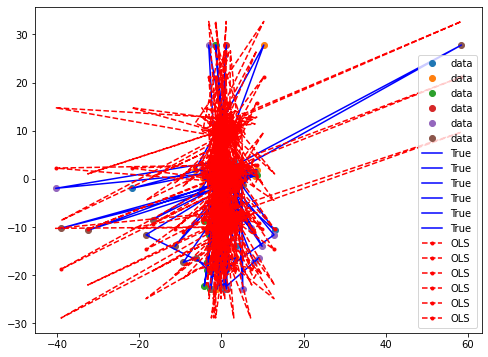

In [54]:
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_train, y_train, 'o', label="data")
ax.plot(X_train, y_train, 'b-', label="True")
ax.plot(X_train, results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_train, iv_u, 'r--')
ax.plot(X_train, iv_l, 'r--')
ax.legend(loc='best')


#https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [61]:
model.score(X_train, y_train)


0.6418502533349824

In [ ]:
model.predict(X_train[:10])


In [ ]:
y_train

In [ ]:
type(X_train)

In [ ]:
print(X_train.shape)
print(y.shape)
print(y_train.shape)
print(X.shape)
print(y_test.shape)

In [ ]:
model.predict(df_abril)

In [55]:
# crear columnas condicionalmente
condiciones22 = [
    (modelo__bcp["size"]<0),
    (modelo__bcp["size"]>=0),
]
condiciones23 = [
    (modelo__bcp["cap"]<0),
    (modelo__bcp["cap"]>=0),
]
condiciones24 = [
    (modelo__bcp["loan"]<0),
    (modelo__bcp["loan"]>=0),
]
condiciones25 = [
    (modelo__bcp["dep"]<0),
    (modelo__bcp["dep"]>=0),
]
condiciones26 = [
    (modelo__bcp["prov"]<0),
    (modelo__bcp["prov"]>=0),
]
condiciones27 = [
    (modelo__bcp["pbi"]<0),
    (modelo__bcp["pbi"]>=0),
]
opciones = [0.0, 1.0]

# incluir condiciones y opciones
modelo__bcp["efect_size"] = np.select(condiciones22, opciones)
modelo__bcp["efect_cap"] = np.select(condiciones23, opciones)
modelo__bcp["efect_loan"] = np.select(condiciones24, opciones)
modelo__bcp["efect_dep"] = np.select(condiciones25, opciones)
modelo__bcp["efect_prov"] = np.select(condiciones26, opciones)
modelo__bcp["efect_pbi"] = np.select(condiciones26, opciones)


modelo__bcp

<ipython-input-55-50d45599e1bb>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo__bcp["efect_size"] = np.select(condiciones22, opciones)
<ipython-input-55-50d45599e1bb>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo__bcp["efect_cap"] = np.select(condiciones23, opciones)
<ipython-input-55-50d45599e1bb>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,banco,mes,year,roa,size,cap,loan,dep,prov,pbi,...,i,ftamn,tpmn,efect_roa,efect_size,efect_cap,efect_loan,efect_dep,efect_prov,efect_pbi
88,BCP,enero,2014,1.083969,0.565524,-0.275862,0.347605,-1.878980,2.839013,4.228164,...,0.0,NaN,-3.264528,1.0,1.0,0.0,1.0,0.0,1.0,1.0
89,BCP,febrero,2014,-1.175223,2.122662,4.218534,-0.041819,1.103355,-2.640422,5.208232,...,0.0,NaN,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0
90,BCP,marzo,2014,0.496471,-0.755117,-0.995355,0.222459,1.371243,2.832730,5.412275,...,0.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0
91,BCP,abril,2014,-2.245367,0.635389,1.005362,-0.611983,-1.878618,-0.509897,2.923294,...,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0
92,BCP,mayo,2014,-1.493250,-0.616686,-0.265428,-0.196287,1.076572,1.637678,2.590533,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,BCP,diciembre,2020,-22.232111,0.960698,-0.459318,-4.202507,1.137466,1.244132,0.580000,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,1.0
172,BCP,enero,2021,-18.972122,1.049062,-1.582070,-3.575566,-0.165817,0.687454,-1.019978,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
173,BCP,febrero,2021,-25.224444,2.358857,-0.133958,-4.149158,0.518076,2.094209,-3.780000,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,1.0
174,BCP,marzo,2021,19.972663,-0.276522,0.067069,-2.183279,1.535937,1.180930,18.210004,...,0.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [56]:
exog1 = ['efect_size','efect_cap','efect_loan','efect_dep','efect_prov','efect_pbi']
endo1 = ['efect_roa']
X1 = modelo__bcp[exog1]
y1 = modelo__bcp[endo1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 3)

In [57]:
import statsmodels.api as sm
res2 = sm.OLS(y1_train, X1_train).fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:              efect_roa   R-squared (uncentered):                   0.529
Model:                            OLS   Adj. R-squared (uncentered):              0.493
Method:                 Least Squares   F-statistic:                              14.59
Date:                Sat, 24 Jul 2021   Prob (F-statistic):                    1.41e-09
Time:                        12:26:18   Log-Likelihood:                         -47.712
No. Observations:                  70   AIC:                                      105.4
Df Residuals:                      65   BIC:                                      116.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

ValueError: x and y must have same first dimension, but have shapes (70, 6) and (18, 1)

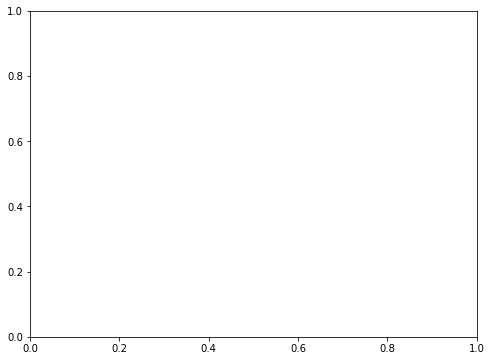

In [58]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X1_train, y1_test, 'o', label="Data")
ax.plot(X1_train, y1_train, 'b-', label="True")
ax.plot(X1_train, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(X1_train, iv_u, 'r--')
ax.plot(X1_train, iv_l, 'r--')
legend = ax.legend(loc="best")

In [59]:
#Modelo GLS
glsar_model = sm.GLSAR(y_train, X_train, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                                GLSAR Regression Results                               
Dep. Variable:                    roa   R-squared (uncentered):                   0.617
Model:                          GLSAR   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              16.88
Date:                Sat, 24 Jul 2021   Prob (F-statistic):                    1.66e-11
Time:                        12:26:31   Log-Likelihood:                         -200.64
No. Observations:                  69   AIC:                                      413.3
Df Residuals:                      63   BIC:                                      426.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:

print(glsar_results.params)

print(glsar_results.bse)

size    0.165492
cap     0.181514
loan    1.806568
dep    -0.354556
prov   -0.162235
pbi     0.379386
dtype: float64
size    0.218107
cap     0.204444
loan    0.328118
dep     0.404687
prov    0.129033
pbi     0.060021
dtype: float64


In [69]:
X.shape[0]

88

In [80]:
y.tail()

,roa
171,-22.232111
172,-18.972122
173,-25.224444
174,19.972663
175,27.792865


In [72]:
y.shape[0] != X.shape[0]

False

In [79]:
X.tail()

,size,cap,loan,dep,prov,pbi
171,0.960698,-0.459318,-4.202507,1.137466,1.244132,0.580000
172,1.049062,-1.582070,-3.575566,-0.165817,0.687454,-1.019978
173,2.358857,-0.133958,-4.149158,0.518076,2.094209,-3.780000
174,-0.276522,0.067069,-2.183279,1.535937,1.180930,18.210004
175,-1.377373,10.321716,-1.506652,1.158958,-3.106261,58.490344


In [78]:
# FE und RE model (modelo de efectos fijos y efectos aleatorios)
#https://ichi.pro/es/una-guia-para-la-regresion-de-datos-de-panel-teoria-e-implementacion-con-python-84133124857080
from linearmodels import PanelOLS
from linearmodels import RandomEffects
# random effects model
exog = sm.tools.tools.add_constant(X['size'])
endog = X['loan']
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

ValueError: Series can only be used with a 2-level MultiIndex